In [2]:
import numpy as np
import matplotlib.pyplot as plt
from volatility import heston
import scipy.stats as st 

**Theorem (S. Heston, 1993).** 
$$
C = \frac{s-e^{-rT} K}{2} + \frac1\pi \int_0^\infty 
\mathrm{Re}\left( \frac{e^{-iu\ln K} (s \tilde\phi(u) - e^{-rT}K \phi(u))}{iu} \right) du, 
$$
where $\phi(u) = E e^{iu\ln X_T}$ is characteristic function of log-price $X_T = \ln S_T$ wrt martingale measure,
$\tilde\phi(u)$ is characteristic function of log-price wrt martingale measure for wich $e^{rt}/S_t$ is martingale. This functions are related to each one:

$$
\tilde\phi(u) = \frac{\phi(u-i)}{with e^{rT}}.
$$
Function $\phi(u)$ has the form (с $i=\sqrt{-1}$)
$$
\phi(u) = \exp(C(u) + D(u)v + iu \ln s),
$$
where
$$
\begin{aligned}
&C(u) = irT u + \frac{\kappa\theta}{\sigma^2}
  \left(
    (\kappa- i\rho\sigma u - d(u)) T -
    2\ln\left( \frac{1-g(u)e^{-d(u)T}}{1-g(u)} \right)
  \right),\\
&D(u) = \frac{\kappa - i\rho\sigma u - d(u)}{\sigma^2}
  \left( \frac{1-e^{-d(u)T}}{1-g(u)e^{-d(u)T}} \right),
\end{aligned}
$$
and
$$
d(u) = \sqrt{(i\rho\sigma u - \kappa)^2 + \sigma^2(iu + u^2)}, \qquad
g(u) = \frac{i\rho\sigma u- \kappa +d(u)}{i\rho\sigma u - \kappa -d(u)}.
$$


## Problem 1. Implied volatility curves in Heston model

In [36]:
v = 0.1
kappa = 3
theta = 0.1 
sigma = 0.3
rho = -0.2
s = 1

In [37]:
H = heston.Heston(s, v, kappa, theta, sigma, rho)

In [38]:
K = np.linspace(0.7, 1.8, 20)

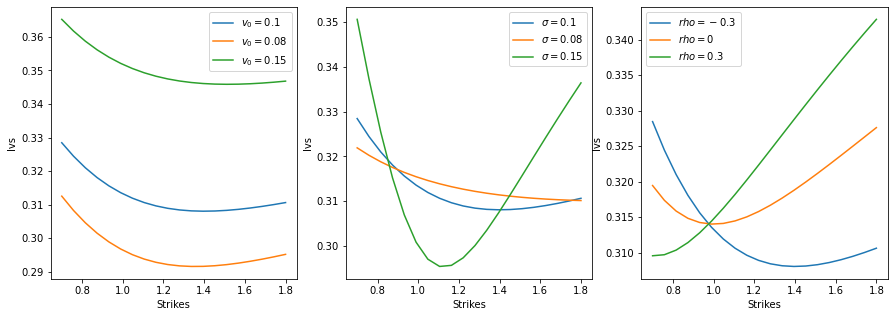

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Dependence on v
v_1 = 0.08
v_2 = 0.15
H_1 = heston.Heston(s, v_1, kappa, theta, sigma, rho)
H_2 = heston.Heston(s, v_2, kappa, theta, sigma, rho)

t = 0.5

ax[0].plot(K, H.iv(t, K), label="$v_0 = 0.1$")
ax[0].plot(K, H_1.iv(t, K), label="$v_0 = 0.08$")
ax[0].plot(K, H_2.iv(t, K), label="$v_0 = 0.15$")
ax[0].legend()
ax[0].set_xlabel("Strikes")
ax[0].set_ylabel("Ivs")

# Dependence on sigma
sigma_1 = 0.15
sigma_2 = 0.8
H_1 = heston.Heston(s, v, kappa, theta, sigma_1, rho)
H_2 = heston.Heston(s, v, kappa, theta, sigma_2, rho)

t = 0.5

ax[1].plot(K, H.iv(t, K), label="$\sigma = 0.1$")
ax[1].plot(K, H_1.iv(t, K), label="$\sigma = 0.08$")
ax[1].plot(K, H_2.iv(t, K), label="$\sigma = 0.15$")
ax[1].legend()
ax[1].set_xlabel("Strikes")
ax[1].set_ylabel("Ivs")

# Dependence on rho
rho_1 = 0
rho_2 = 0.2
H_1 = heston.Heston(s, v, kappa, theta, sigma, rho_1)
H_2 = heston.Heston(s, v, kappa, theta, sigma, rho_2)

t = 0.5

ax[2].plot(K, H.iv(t, K), label="$rho = -0.3$")
ax[2].plot(K, H_1.iv(t, K), label="$rho = 0$")
ax[2].plot(K, H_2.iv(t, K), label="$rho = 0.3$")
ax[2].legend()
ax[2].set_xlabel("Strikes")
ax[2].set_ylabel("Ivs")


plt.show()